In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '/mnt/c/Users/ignacio.ibarra/Dropbox/annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


In [7]:
df = mb.bindome.datasets.ProBound.GR_mult_conc()
df = df.sort_values(1, ascending=False).reset_index(drop=True)

In [8]:
data = df.head(1000)

In [9]:
n_rounds = 1

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 2

/tmp/ipykernel_13907/3315481419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['batch'] = 1
/tmp/ipykernel_13907/3315481419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_count_data'] = 1


loading object (# entries) 1000


/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/multibind/multibind/tl/encoding.py:9: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "onehot_mononuc" failed type inference due to: non-precise type pyobject
During: typing of argument at /mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/multibind/multibind/tl/encoding.py (11)

File "../multibind/tl/encoding.py", line 11:
def onehot_mononuc(seq, label_encoder=LabelEncoder(), onehot_encoder=OneHotEncoder(sparse=False)):
    seq_arr = np.array(list(seq + 'ACGNT'))
    ^

  @jit
/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "onehot_mononuc" was compiled in object mode without forceobj=True.

File "../multibind/tl/encoding.py", line 10:
@jit
def onehot_mononuc(seq, label_encoder=LabelEncoder(), onehot_encoder=OneHotEncoder(sparse=False)):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/rio/min

next w 14
kernel to optimize 0
setting kernel at 0 to 1
setting kernel at 1 to 0
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: nan
Epoch: 11, Loss: nan
before shift optim.


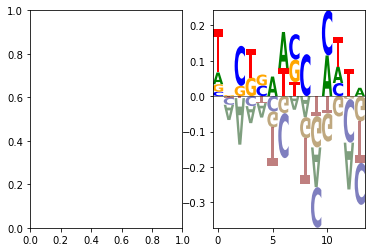

after shift optimz model


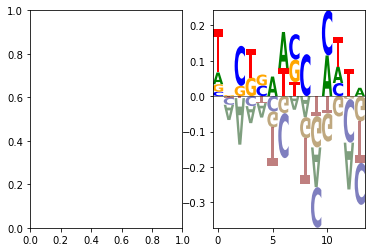


kernel to optimize 1
setting kernel at 0 to 0
setting kernel at 1 to 1
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: nan
Epoch: 11, Loss: nan
before shift optim.


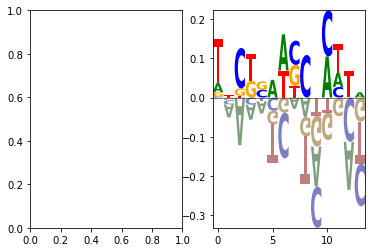

optimize_motif_shift (once)...mono grad 1 None
di grad 1 None
mono grad 1 None
di grad 1 None
nan nan nan
after shift optimz model


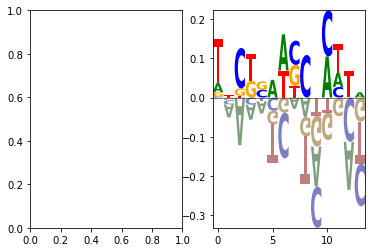


next w 16
kernel to optimize 0
setting kernel at 0 to 1
setting kernel at 1 to 0
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: nan
Epoch: 11, Loss: nan
before shift optim.


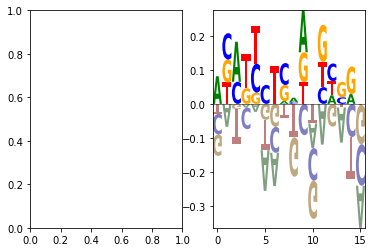

after shift optimz model


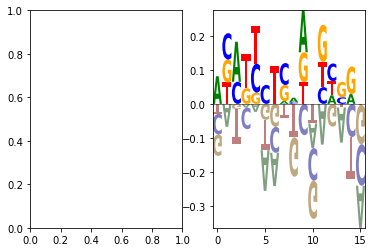


kernel to optimize 1
setting kernel at 0 to 0
setting kernel at 1 to 1
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: nan
Epoch: 11, Loss: nan
before shift optim.


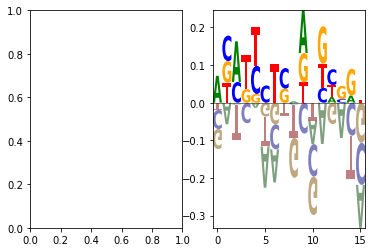

optimize_motif_shift (once)...mono grad 1 None
di grad 1 None
mono grad 1 None
di grad 1 None
nan nan nan
after shift optimz model


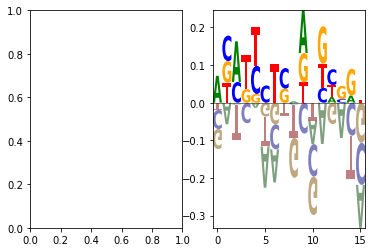

In [11]:
# assign batch and data type

data['batch'] = 1
data['is_count_data'] = 1

print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, single_encoding_step=True)
train = tdata.DataLoader(dataset=dataset, batch_size=25000, shuffle=True)

model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=16, max_w=18, n_rounds=n_rounds, n_kernels=2)                
res = []
model_by_k = {}
